Suggestion de plan pour le notebook commun

## Visualisation
### Dataset Kaggle
#### Images
- **Taille des images**
- **Pourcentage de texte**
- **Orientation du texte ?**
- **Taille des lettres ?**
#### Labels
- **Nombre de lettres/mots par texte**
- **Mots les plus fréquents** (avec ou sans stop word ?)
### Sample dataset RVL-CDIP
#### Images
- **Taille des images**
- **Pourcentage de texte**
- **Orientation du texte ?**
- **Taille des lettres ?**
#### Labels
- **Distribution des labels**
## TODO
- **Trouver une charte graphique**
- **Peut etre modifier les type de plot**
- **Commenter chacun des plots**
- **Trouver d'autres choses à représenter ?**


## Visualisation

In [225]:
import sys
sys.path.insert(0, '../')

import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns


from src.features import build_features

In [2]:
#paths
kaggle_path = "./../data/raw/ImageAndXML_Data"
rvlcdip_path = "./../data/raw/selected"

#color palette
palette = ["#4e342e", "#5d4037", "#6d4c41", "#8d6e63", "#a1887f", "#d7ccc8"]

### Dataset Kaggle

In [279]:
#puting all the files name into a list
file_list = []
for file in glob.glob(f"{kaggle_path}/*.tif"):
    file_list.append(file.split('\\')[-1])

#puting all the pictures into a list
picture_list = []
for file in glob.glob(f"{kaggle_path}/*.tif"):
    img = Image.open(file)
    picture_list.append(img)

#puting the content of the target files into a list
text_list = []
for file in glob.glob(f"{kaggle_path}/*_ocr.xml"):
    text_list.append(build_features.parse_xml(file))

#stitching in a dataframe file name, picture and text
df = pd.DataFrame(columns=['filename', 'picture', 'text'])
df['filename'] = file_list
df['picture'] = picture_list
df['text'] = text_list

In [280]:
display(df.head())
print(f"Le dataset issue de Kaggle contient {df.shape[0]} documents.")
print(f"On compte {df.isna().sum().sum()} valeurs manquantes dans le dataset")

filename                                            picture  \
0  0000223278.tif  <PIL.TiffImagePlugin.TiffImageFile image mode=...   
1  0001136521.tif  <PIL.TiffImagePlugin.TiffImageFile image mode=...   
2  0001139626.tif  <PIL.TiffImagePlugin.TiffImageFile image mode=...   
3  0001139716.tif  <PIL.TiffImagePlugin.TiffImageFile image mode=...   
4  0001144288.tif  <PIL.TiffImagePlugin.TiffImageFile image mode=...   

                                                text  
0  r> B AT (U.K. and EXPORT) limited Export House...  
1  Tod Bata* a company, inc /advertising 'JiJI t ...  
2  Tod Botes a company, inc /advertising 1515 • H...  
3  Ted Bates a company, inc./advertising ISIS B«e...  
4  Tod Bates new york/advertising * *tW> "ax—J±- ...

Le dataset issue de Kaggle contient 520 documents.
On compte 0 valeurs manquantes dans le dataset


#### Images

**Taille des images**

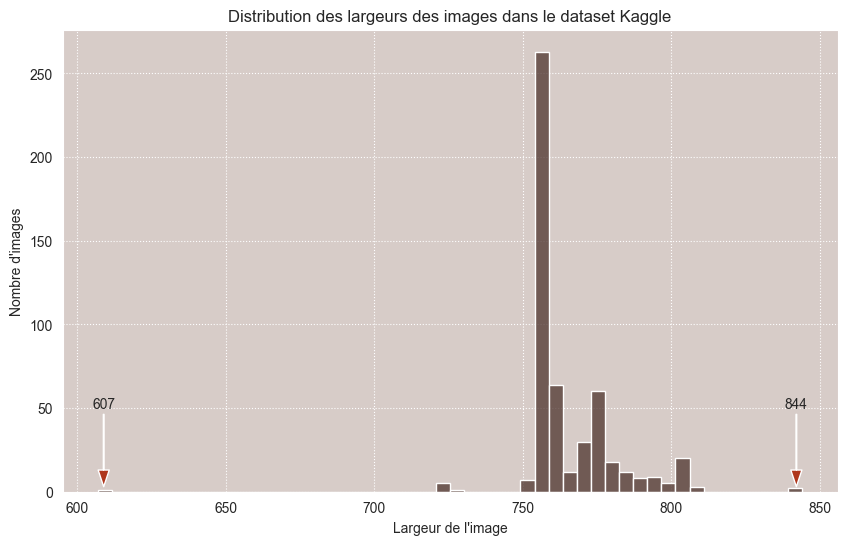

In [281]:
#copying the first dimension of each picture into an array. The second dimension is always 1000.

df['lenght'] = df.picture.apply(lambda x: x.size[0])
df['height'] = df.picture.apply(lambda x: x.size[1])

dim_list = df.lenght

#ploting the dimensions
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(palette[-1])
plt.xlabel('Largeur de l\'image')
plt.ylabel('Nombre d\'images')

sns.histplot(dim_list, bins=50)
plt.annotate(min(df.lenght), xy=(min(df.lenght)+2, 3), xytext=(min(df.lenght)+2, 50), horizontalalignment="center", arrowprops=dict(facecolor='#AF361C', width=0.5, headwidth=8))
plt.annotate(max(df.lenght), xy=(max(df.lenght)-2, 3), xytext=(max(df.lenght)-2, 50), horizontalalignment="center", arrowprops=dict(facecolor='#AF361C', width=0.5, headwidth=8))
sns.set_style("darkgrid", { "grid.linestyle": ":"})
sns.set_palette(palette)

plt.title('Distribution des largeurs des images dans le dataset Kaggle')
#plt.grid(True)
plt.show()

La majorité des images ont des dimensions se situant entre 750 et 780 x 1000 pixels.

On trouve quelques outliers qu'on devra peut etre redimensionner.

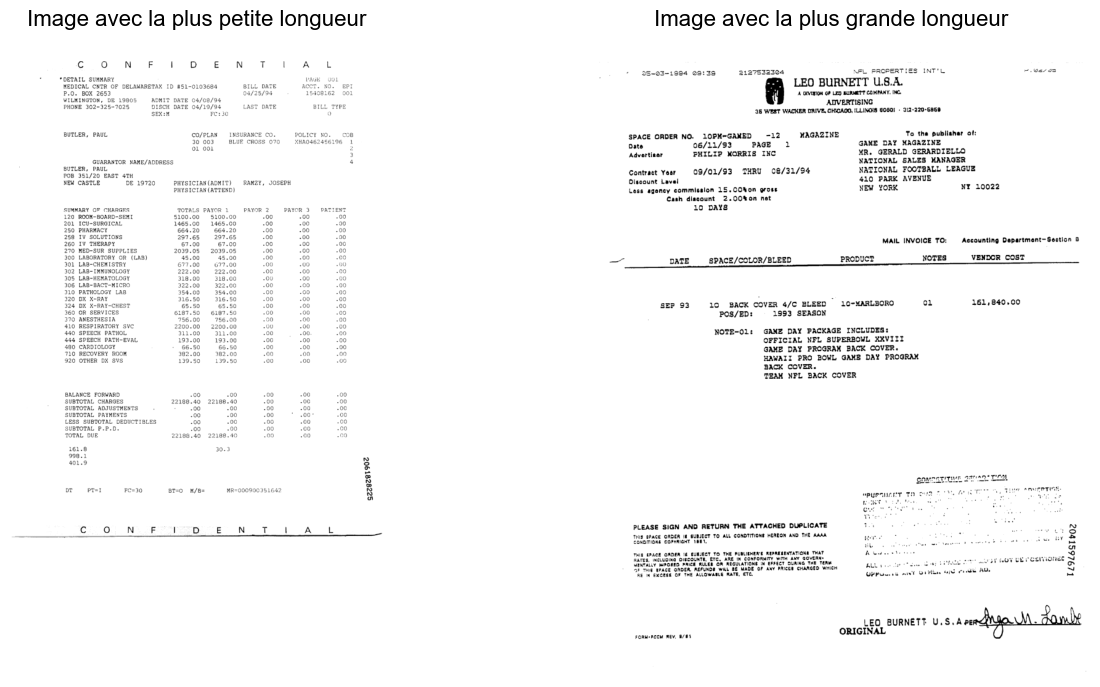

In [282]:
#On affiche l'image la plus petite et l'image la plus grande pour voir s'il y a des disparitées
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1, frameon=True)
plt.title('Image avec la plus petite longueur', {'fontsize': 16,
                                           'fontweight': 4,
                                           'color': 'black',
                                           'verticalalignment': 'center',
                                           'horizontalalignment': 'center'}, pad=30)
plt.imshow(df.sort_values(by=['lenght'], ascending=True)['picture'].iloc[0], cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Image avec la plus grande longueur', {'fontsize': 16,
                                           'fontweight': 4,
                                           'color': 'black',
                                           'verticalalignment': 'center',
                                           'horizontalalignment': 'center'}, pad=30)
plt.imshow(df.sort_values(by=['lenght'], ascending=False)['picture'].iloc[0], cmap='gray')
plt.axis('off')
plt.show()

**Pourcentage de pixels noir**

In [283]:
#get the percent of black pixels in the images
df['bpix_per'] = df.picture.apply(lambda x: build_features.get_black_percent(x)[1])

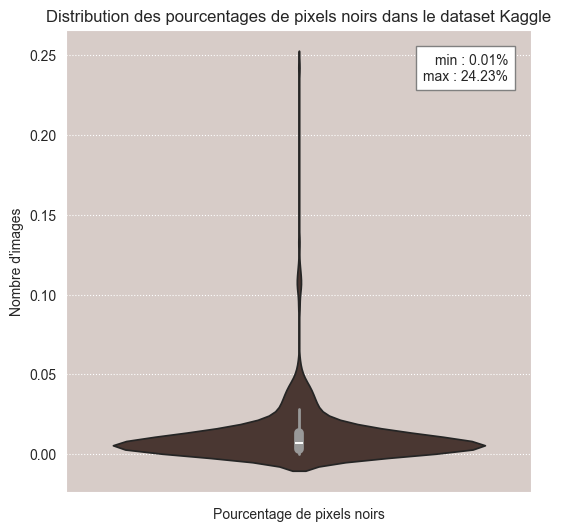

In [284]:
#ploting the black percent of the images
plt.figure(figsize=(6, 6))
plt.gca().set_facecolor(palette[-1])
plt.xlabel('Pourcentage de pixels noirs')
plt.ylabel('Nombre d\'images')
sns.set_palette(palette)
sns.set_style("darkgrid", { "grid.linestyle": ":"})
sns.violinplot(df.bpix_per, inner_kws=dict(box_width=7, whis_width=2, color="0.6"))
plt.text(0.95, 0.95, f"min : {min(df.bpix_per) * 100:.2f}%\nmax : {max(df.bpix_per) * 100:.2f}%", horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='grey', pad=5))
plt.title('Distribution des pourcentages de pixels noirs dans le dataset Kaggle')
plt.show()

**Orientation du texte**

In [285]:
#get the global orientation of the pictures
df['orientation'] = df.filename.apply(lambda x:build_features.get_orientation(f"{kaggle_path}/{x}"))

print(df.orientation.isna().sum(),'images n\'ont pas une orientation detectée')

35 images n'ont pas une orientation detectée


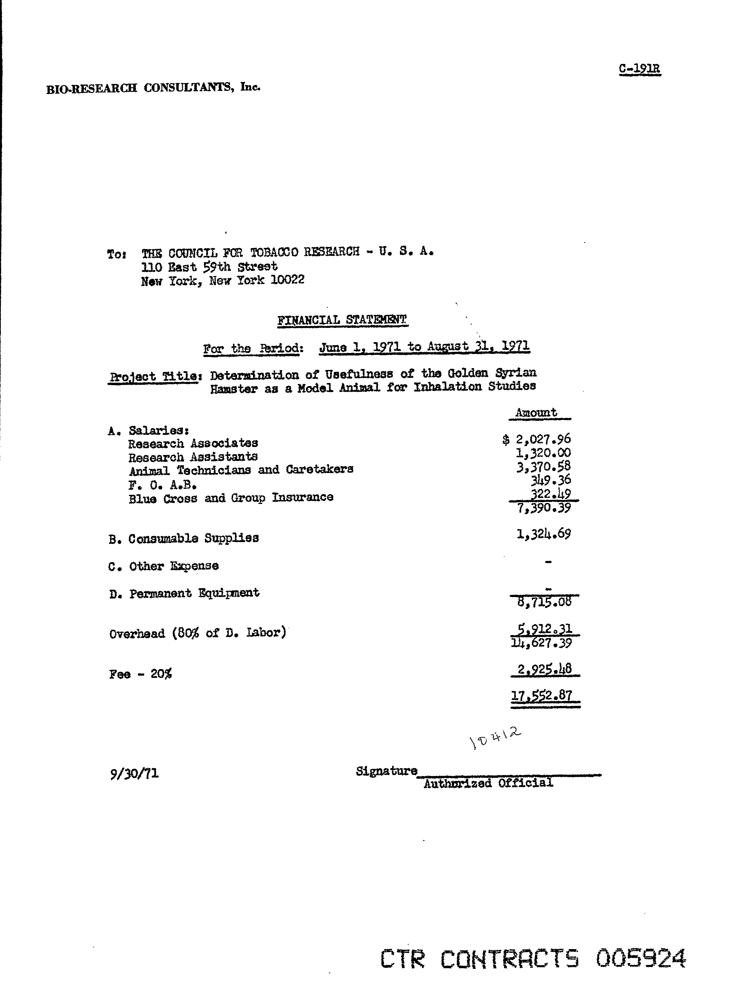

In [286]:
df.sort_values(['orientation']).picture.iloc[0]

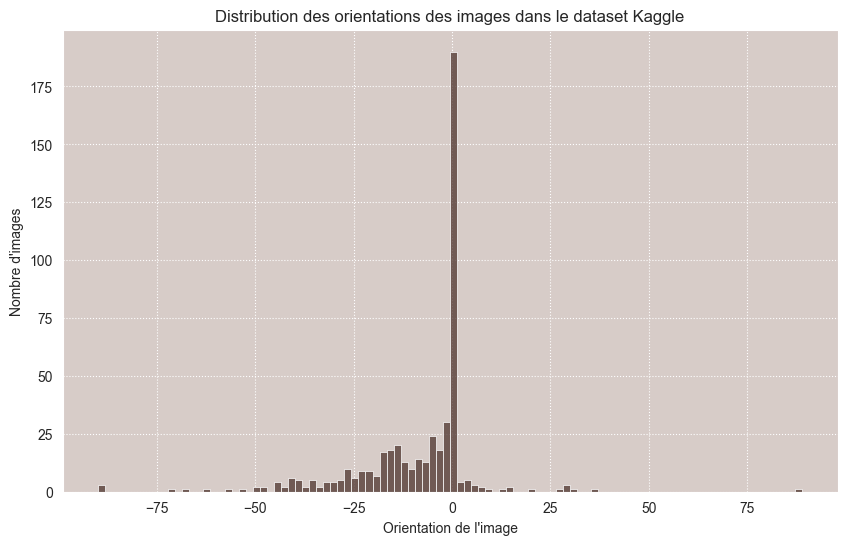

In [287]:
#ploting the orientation of the images
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(palette[-1])
plt.xlabel('Orientation de l\'image')
plt.ylabel('Nombre d\'images')
sns.set_palette(palette)
sns.histplot(df['orientation'], bins=100)
plt.title('Distribution des orientations des images dans le dataset Kaggle')
plt.show()

La grande majorité des images ont une orientation globale horizontale.

On remarque que quelques images ont une orientation à 90° ce qui implique que le texte est à la verticale. Il faudra surement reorienter ces images.

On constate egalement que beaucoup d'image ont une orientation entre 0° et 90°. Cela provient des autres features de l'image. par exemple des marges, des tableaux, des logos.

<Figure size 5000x5000 with 0 Axes>

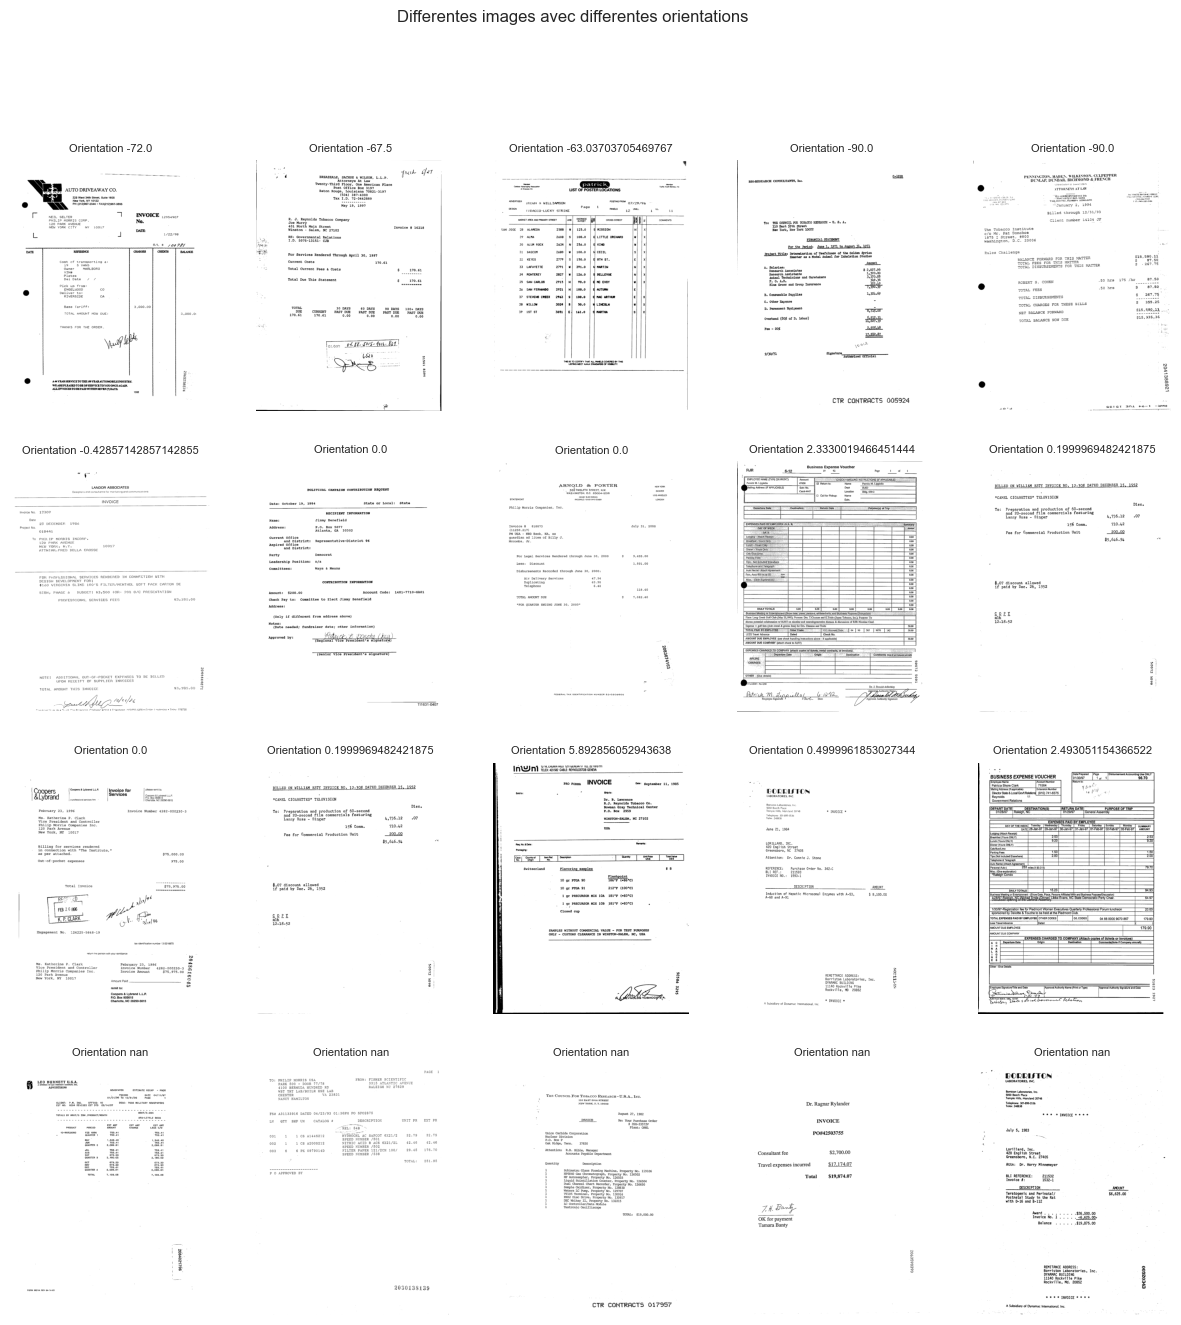

In [288]:
plt.figure(figsize=(50, 50))
fig, axs = plt.subplots(4,5, figsize=(15, 15))
fig.suptitle('Differentes images avec differentes orientations')


df90 = df[df.orientation < -60].sort_values(by=['orientation'], ascending=True).sample(5)
for x in range(0,5):
    axs[0,x].set_title('Orientation '+ str(df90['orientation'].iloc[x]), fontdict={'fontsize':8})
    axs[0,x].imshow(df90['picture'].iloc[x], cmap='gray')
    axs[0,x].axis('off')


df45 = df[(df.orientation >= -45) & (df.orientation < 20)].sort_values(by=['orientation'], ascending=True).sample(5)
for x in range(0,5):
    axs[1,x].set_title('Orientation '+ str(df45['orientation'].iloc[x]), fontdict={'fontsize':8})
    axs[1,x].imshow(df45['picture'].iloc[x], cmap='gray')
    axs[1,x].axis('off')

df0 = df[(df.orientation >= 0) & (df.orientation < 10)].sort_values(by=['orientation'], ascending=True).sample(5)
for x in range(0,5):
    axs[2,x].set_title('Orientation '+ str(df0['orientation'].iloc[x]), fontdict={'fontsize':8})
    axs[2,x].imshow(df0['picture'].iloc[x], cmap='gray')
    axs[2,x].axis('off')

dfnan = df[df.orientation.isna()].sort_values(by=['orientation'], ascending=True).sample(5)
for x in range(0,5):
    axs[3,x].set_title('Orientation '+ str(dfnan['orientation'].iloc[x]), fontdict={'fontsize':8})
    axs[3,x].imshow(dfnan['picture'].iloc[x], cmap='gray')
    axs[3,x].axis('off')
    
plt.show();


On remarque que l'orientation remontée n'est pas réaliste. Les differents elements dans les images comme les barres horizontales ou bien du texte écrit verticalement ou encore des logo perturbent la detection d'un angle

**Taille des lettres**

In [289]:
#On recupere la taille moyenne des lettres pour voir s'il y a de grosses disparités dans les documents
df['letter_size'] = df['filename'].apply(lambda x: build_features.get_letter_size(f"{kaggle_path}/{x}"))
display(df.describe())

lenght  height    bpix_per  orientation  letter_size
count  520.000000   520.0  520.000000   485.000000    520.00000
mean   763.911538  1000.0    0.011832    -8.797607      7.71250
std     16.855268     0.0    0.018399    16.026929     42.24669
min    607.000000  1000.0    0.000107   -90.000000      1.00000
25%    754.000000  1000.0    0.003241   -15.166667      5.00000
50%    754.000000  1000.0    0.006656    -2.107145      6.00000
75%    773.000000  1000.0    0.013354     0.000000      7.00000
max    844.000000  1000.0    0.242264    88.999985    968.00000

On remarque une valeur abérante avec un document possédant une lettre avec une taille de police de 968, soit une lettre de la taille du document.

Regardons de quel document on parle :

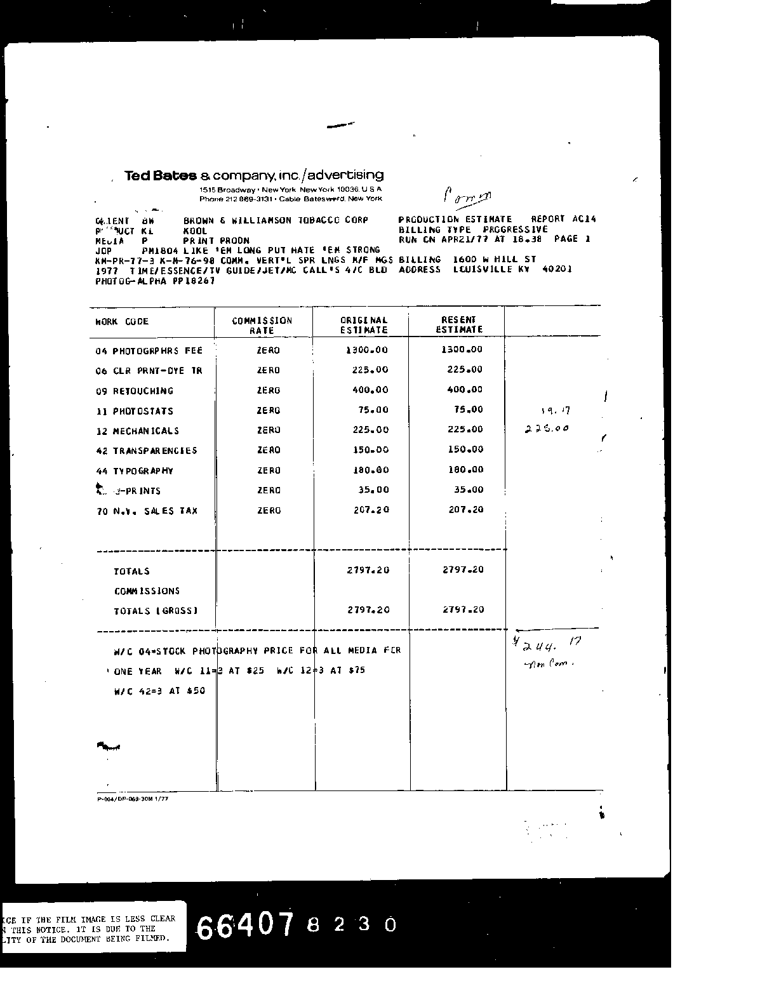

In [290]:
"""plt.imshow(df[df.letter_size == 968]['picture'].iloc[0], cmap='grey')
plt.axis('off')
plt.show();"""

df[df.letter_size == 968]['picture'].iloc[0]

On remarque que ce document possede une bordure qui a été confondue avec une lettre. Il faudra le prendre en compte dans le choix de l'OCR pour ne pas avoir de lettres détéctées avec des tailles abérantes. On va remplacer cette valeur pas la valeur moyenne de la police d'ecriture.

In [181]:
df.loc[df[df.letter_size == 968].index[0],'letter_size'] = df[df.letter_size < 968]['letter_size'].mean()

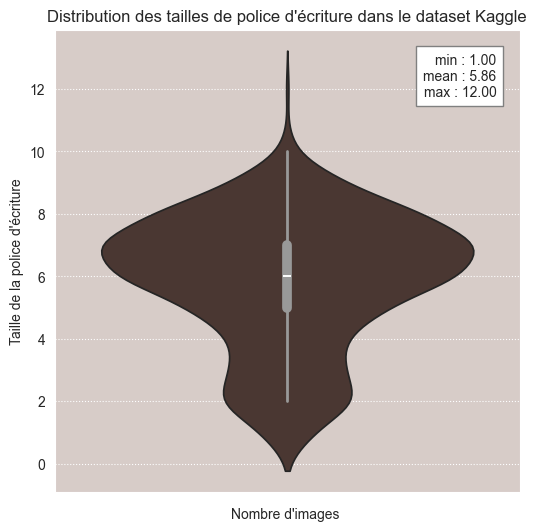

In [190]:
#ploting the black percent of the images
plt.figure(figsize=(6, 6))
plt.gca().set_facecolor(palette[-1])
plt.xlabel('Nombre d\'images ')
plt.ylabel('Taille de la police d\'écriture')
sns.set_palette(palette)
sns.set_style("darkgrid", { "grid.linestyle": ":"})
#sns.boxplot(df.letter_size, )
sns.violinplot(df.letter_size, inner_kws=dict(box_width=7, whis_width=2, color="0.6"))
plt.text(0.95, 0.95, f"min : {min(df.letter_size):.2f}\nmean : {(df.letter_size.mean()):.2f}\nmax : {max(df.letter_size):.2f}", horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='grey', pad=5))
plt.title('Distribution des tailles de police d\'écriture dans le dataset Kaggle')
plt.show()

La taille moyenne des lettres est de 5.86 pixel.

Les differentes librairies d'ocr indiquent que les tailles ideales doivent se situer autour de 30 pixels.

Pour une taille de police inferieure a 10 pixels il est recommandé d'avoir uen resolution entre 400 et 600 dpi

In [197]:
#get the average dpi of the pictures
df['dpi'] = df.picture.apply(lambda x: x.info['dpi'])


#lister les valeurs uniques de dpi
display(df.dpi.describe())

count              520
unique               1
top       (72.0, 72.0)
freq               520
Name: dpi, dtype: object

Les valeurs de dpi sont toutes les mêmes dans ce dataset, certainement car les documents ont tous été numérisés de la même façon.

Cela dit, le dpi est faible comparé à ce qu'on aurait voulu pour faire de l'ocr de façon optimale.

On s'attendra donc à avoir des erreurs dans le texte suite à l'ocr.

#### __Labels__

**Nombre de lettres/mots par texte**

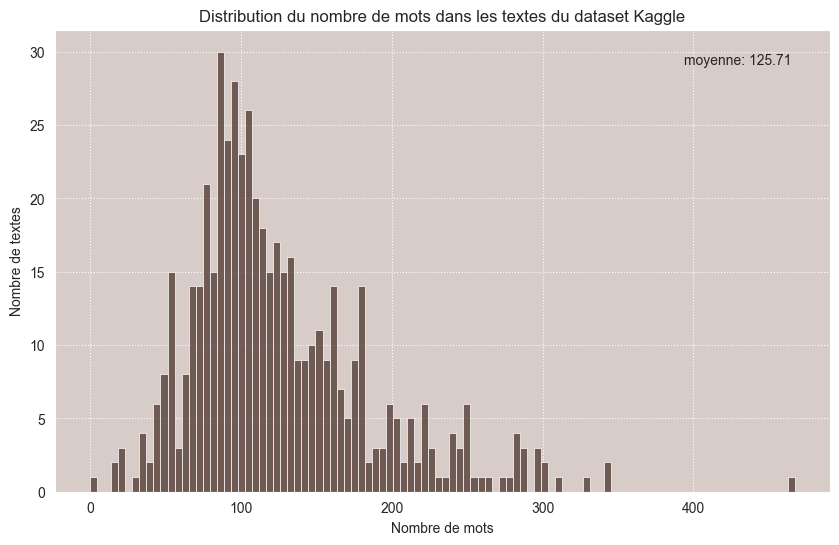

In [198]:
#count the number of words in each texts
df['nb_word'] = df.text.apply(lambda x: len(x.split()))
"""
word_list = []
for text in df.text:
    word_list.append(len(text.split()))
"""
#ploting the number of words in the texts
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(palette[-1])
plt.xlabel('Nombre de mots')
plt.ylabel('Nombre de textes')
sns.set_palette(palette)
sns.histplot(df['nb_word'], bins=100)
plt.text(0.95, 0.95, f"moyenne: {np.mean(df['nb_word']):.2f}", horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)
plt.title('Distribution du nombre de mots dans les textes du dataset Kaggle')
plt.show()




On a 125.71 mots en moyenne par texte.

<Figure size 5000x5000 with 0 Axes>

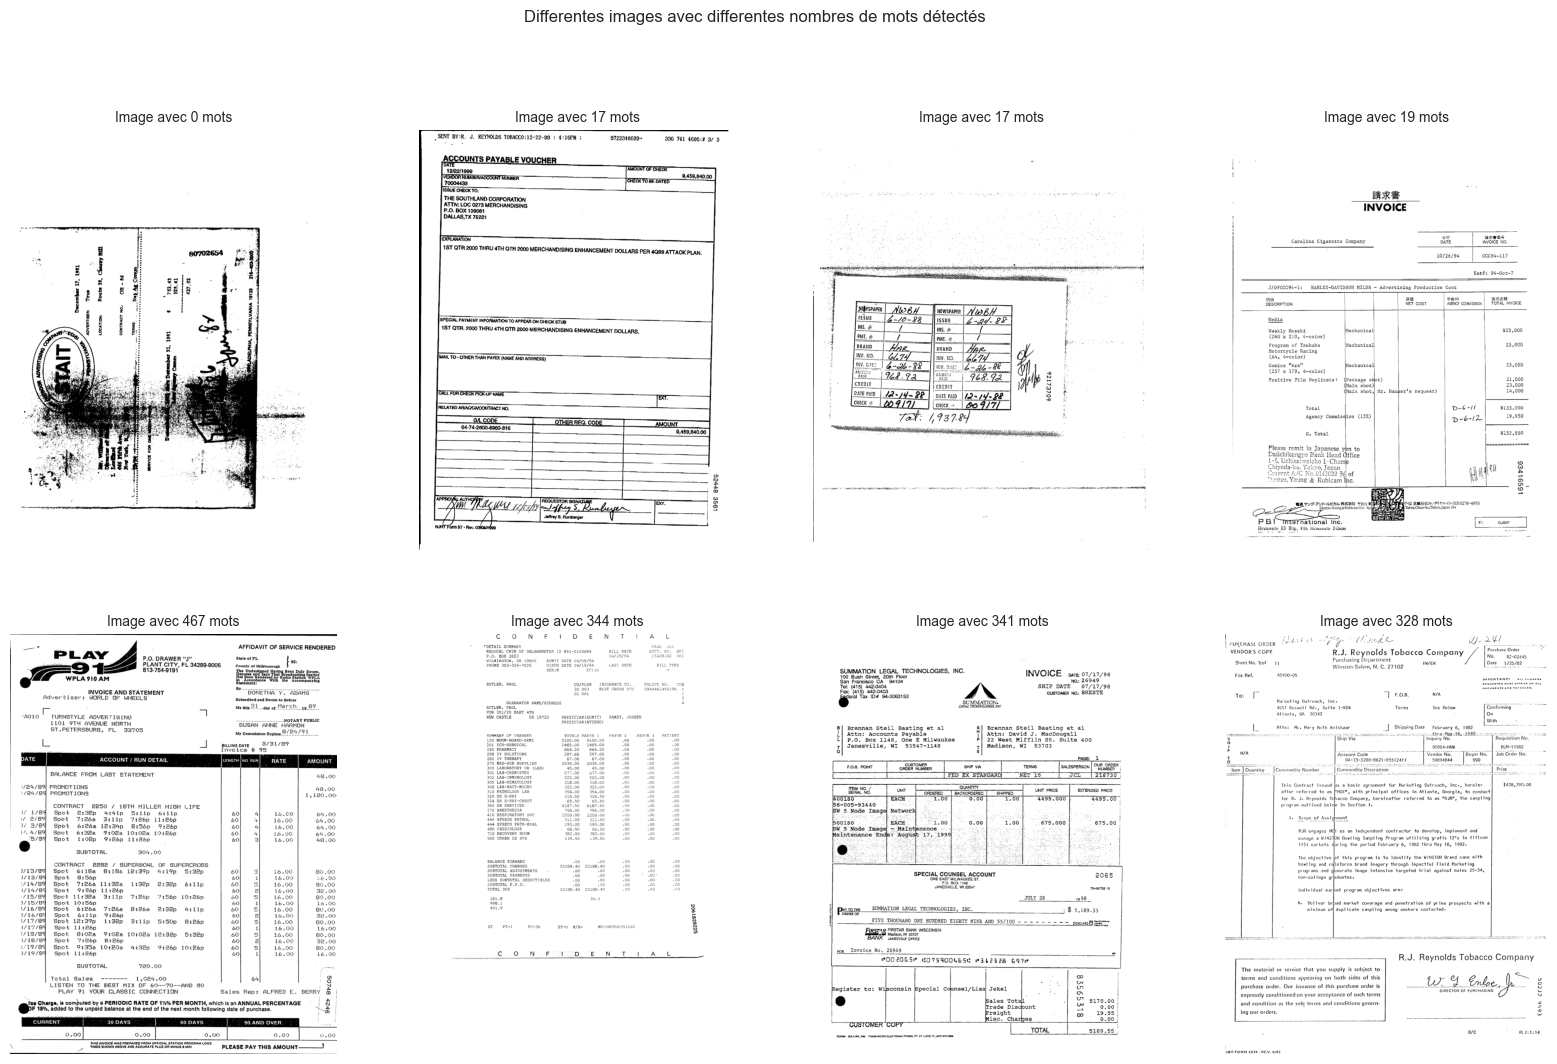

In [218]:
plt.figure(figsize=(50, 50))
fig, axs = plt.subplots(2,4, figsize=(20, 12))
fig.suptitle('Differentes images avec differentes nombres de mots détectés')


dfmin = df.nsmallest(4,'nb_word')
for x in range(0,4):
    axs[0,x].set_title(f"Image avec {dfmin['nb_word'].iloc[x]} mots", fontdict={'fontsize':10})
    axs[0,x].imshow(dfmin['picture'].iloc[x], cmap='gray')
    axs[0,x].axis('off');


dfmax = df.nlargest(4,'nb_word')
for x in range(0,4):
    axs[1,x].set_title(f"Image avec {dfmax['nb_word'].iloc[x]} mots", fontdict={'fontsize':10})
    axs[1,x].imshow(dfmax['picture'].iloc[x], cmap='gray')
    axs[1,x].axis('off');


plt.show();

On remarque que les données detectées ne sont pas parfaite et que beaucoup de texte peut au final ne pas être detecté.

On recherchera l'OCR qui colle au mieux aux données.

**__Mots les plus fréquents__**

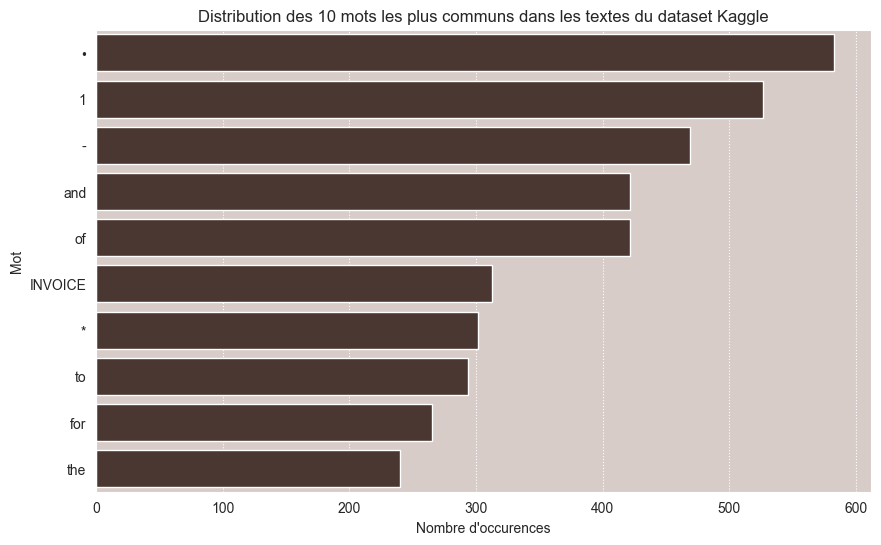

In [220]:
#write a list of all unique words in the texts and count them
word_list = []
for text in df.text:
    for word in text.split():
        word_list.append(word)

word_count = {}
for word in word_list:
    if word in word_count:
        word_count[word] += 1
    else:
        word_count[word] = 1

#ploting the number of occurences of the 10 most common words
sorted_word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(palette[-1])
plt.xlabel('Nombre d\'occurences')
plt.ylabel('Mot')
sns.set_palette(palette)
sns.barplot(x=[x[1] for x in sorted_word_count[:10]], y=[x[0] for x in sorted_word_count[:10]])
plt.title('Distribution des 10 mots les plus communs dans les textes du dataset Kaggle')
plt.show()

On va nettoyer les textes pour ne garder que les mots semantiquement significatifs

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

clean_word_text = []
for text in df.text:
    clean_word_text.append([word for word in text.split() if not word in stopwords.words()])

clean_word_lenght = []
for clean_text in clean_word_text:
    clean_word_lenght.append(len(clean_text))

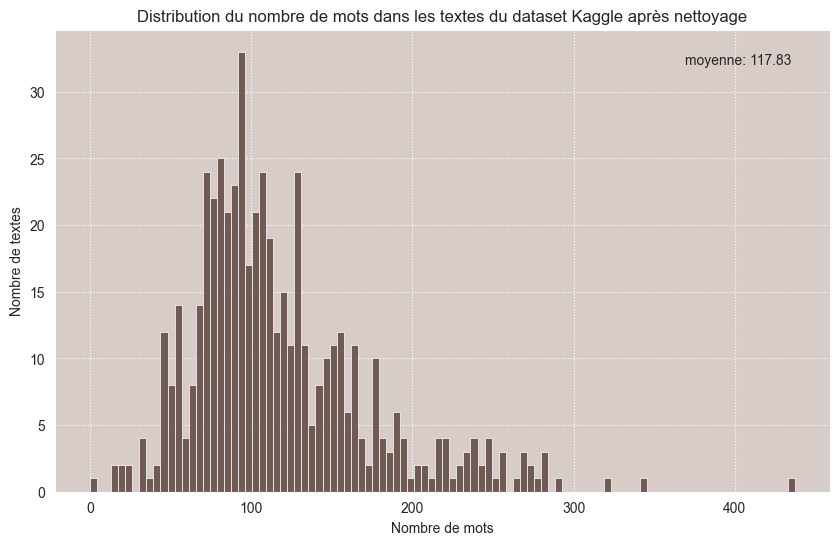

In [245]:
#cleaning the texts
clean_text_list = []
for text in df.text:
    clean_text_list.append(build_features.text_cleaning(text))

#count the number of words in each cleaned texts
word_list = []
for text in clean_text_list:
    word_list.append(len(text.split()))

#ploting the number of words in the cleaned texts
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(palette[-1])
plt.xlabel('Nombre de mots')
plt.ylabel('Nombre de textes')
sns.set_palette(palette)
sns.histplot(list(word_list), bins=100)
plt.text(0.95, 0.95, f"moyenne: {np.mean(word_list):.2f}", horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)
plt.title('Distribution du nombre de mots dans les textes du dataset Kaggle après nettoyage')
plt.show()

C:\Users\sofia\AppData\Local\Temp\ipykernel_37904\1802510864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nb_word['type']='raw'


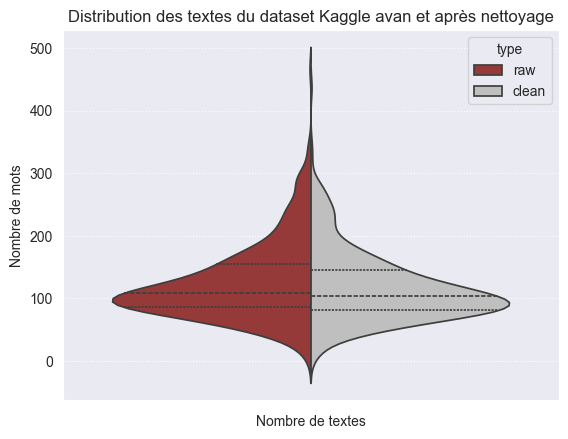

In [276]:
df_nb_word = df[['nb_word']]
df_nb_word['type']='raw'


df_nb_clean = pd.DataFrame(clean_word_lenght, columns = ['nb_word'])
df_nb_clean['type']='clean'


df_words = pd.concat([df_nb_word, df_nb_clean])

plt.xlabel('Nombre de textes')
plt.ylabel('Nombre de mots')
sns.violinplot(data=df_words,  y="nb_word", hue="type", split=True, inner="quart", fill=True, palette={"raw": "brown", "clean": ".75"})
plt.title('Distribution des textes du dataset Kaggle avan et après nettoyage')
plt.show();

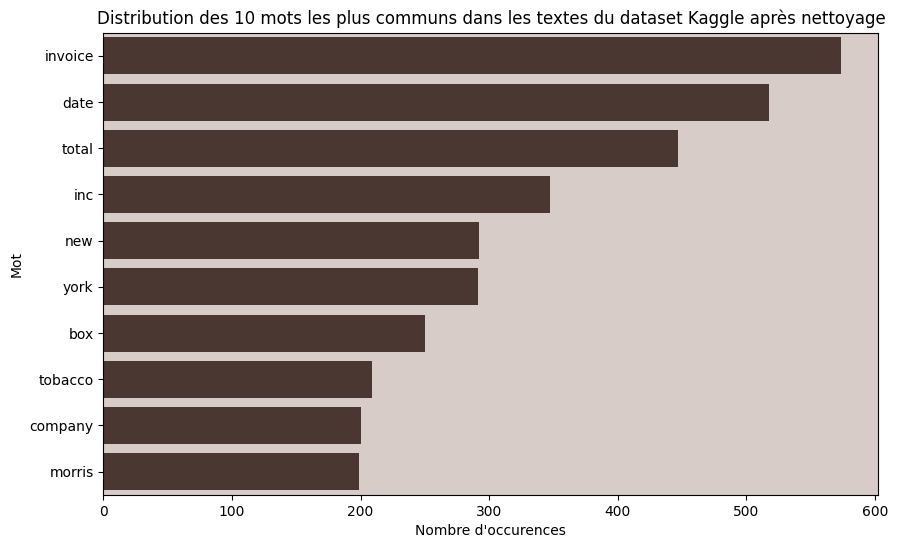

In [6]:
#write a list of all unique words in the texts and count them
word_list = []
for text in clean_text_list:
    for word in text.split():
        word_list.append(word)

word_count = {}
for word in word_list:
    if word in word_count:
        word_count[word] += 1
    else:
        word_count[word] = 1

#ploting the number of occurences of the 10 most common words
sorted_word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(palette[-1])
plt.xlabel('Nombre d\'occurences')
plt.ylabel('Mot')
sns.set_palette(palette)
sns.barplot(x=[x[1] for x in sorted_word_count[:10]], y=[x[0] for x in sorted_word_count[:10]])
plt.title('Distribution des 10 mots les plus communs dans les textes du dataset Kaggle après nettoyage')
plt.show()

Penser à verifier que dans le dataset, la langue detectée

L'ocr a une dépendance à la langue

### Sample dataset RVL-CDIP

In [291]:
#puting all the files name into a list
file_list = []
for file in glob.glob(f"{rvlcdip_path}/*.tif"):
    file_list.append(file.split('\\')[-1])

#puting all the pictures into a list
picture_list = []
for file in glob.glob(f"{rvlcdip_path}/*.tif"):
    img = Image.open(file)
    picture_list.append(img)

#puting the content of the target files into a list
target_list = []
for file in glob.glob(f"{rvlcdip_path}/*.txt"):
    with open(file, 'r') as f:
        target_list.append(f.read())

#stitching in a dataframe file name, picture and target
df = pd.DataFrame(columns=['filename', 'picture', 'target'])
df['filename'] = file_list
df['picture'] = picture_list
df['target'] = target_list

In [292]:
display(df.head())
print(f"le dataset RVL-CDIP contient {df.shape[0]} lignes réparties sur {df.shape[1]} colonnes")
print(f"On compte {df.isna().sum().sum()} valeurs manquantes dans le dataset")

filename                                            picture target
0  0000001531.tif  <PIL.TiffImagePlugin.TiffImageFile image mode=...     12
1  0000010610.tif  <PIL.TiffImagePlugin.TiffImageFile image mode=...     12
2  0000049717.tif  <PIL.TiffImagePlugin.TiffImageFile image mode=...      0
3  0000054785.tif  <PIL.TiffImagePlugin.TiffImageFile image mode=...      7
4  0000072858.tif  <PIL.TiffImagePlugin.TiffImageFile image mode=...     15

le dataset RVL-CDIP contient 992 lignes réparties sur 3 colonnes
On compte 0 valeurs manquantes dans le dataset


#### Images

**Taille des images**

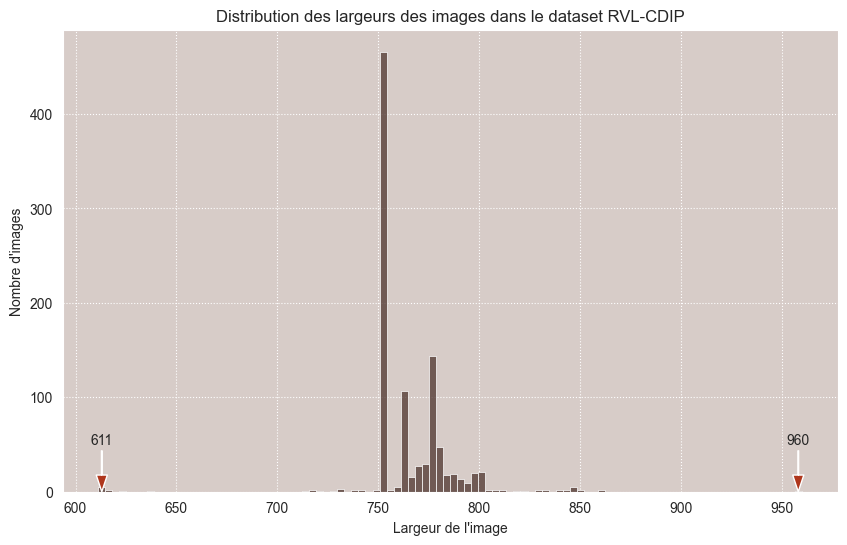

In [293]:
#copying the first dimension of each picture into an array. The second dimension is always 1000.
dim_list = []
for picture in df.picture:
    dim_list.append(picture.size[0])

#ploting the dimensions
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(palette[-1])
plt.xlabel('Largeur de l\'image')
plt.ylabel('Nombre d\'images')

sns.histplot(dim_list, bins=100)
plt.annotate(min(dim_list), xy=(min(dim_list)+2, 0), xytext=(min(dim_list)+2, 50), horizontalalignment="center", arrowprops=dict(facecolor='#AF361C', width=0.5, headwidth=8))
plt.annotate(max(dim_list), xy=(max(dim_list)-2, 0), xytext=(max(dim_list)-2, 50), horizontalalignment="center", arrowprops=dict(facecolor='#AF361C', width=0.5, headwidth=8))
sns.set_style("darkgrid", { "grid.linestyle": ":"})
sns.set_palette(palette)
plt.title('Distribution des largeurs des images dans le dataset RVL-CDIP')
plt.show()


**Pourcentage de pixels noirs**

In [298]:
#get the percent of black pixels in the images
df['black_percent'] = df.picture.apply(lambda x: build_features.get_black_percent(x)[1])

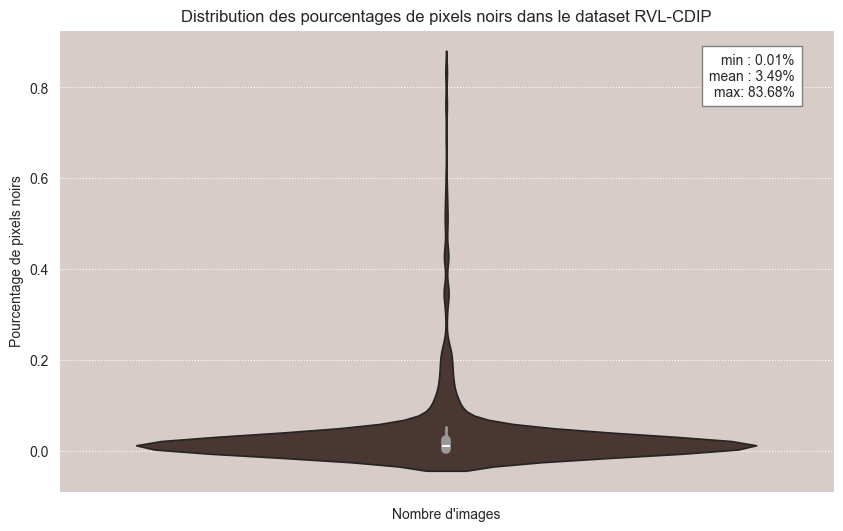

In [299]:

#ploting the black percent of the images
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(palette[-1])
plt.ylabel('Pourcentage de pixels noirs')
plt.xlabel('Nombre d\'images')
#sns.histplot([x[1] for x in black_percent_list], bins=100)
sns.violinplot(df.black_percent, inner_kws=dict(box_width=7, whis_width=2, color="0.6"))
plt.text(0.95, 0.95, f"min : {df.black_percent.min() * 100:.2f}%\nmean : {df.black_percent.mean() * 100:.2f}%\nmax: {df.black_percent.max() * 100:.2f}%", horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='grey', pad=5))
sns.set_style("darkgrid", { "grid.linestyle": ":"})
sns.set_palette(palette)
plt.title('Distribution des pourcentages de pixels noirs dans le dataset RVL-CDIP')
plt.show()

On regarde les images les plus sombres et les plus claires

<Figure size 5000x5000 with 0 Axes>

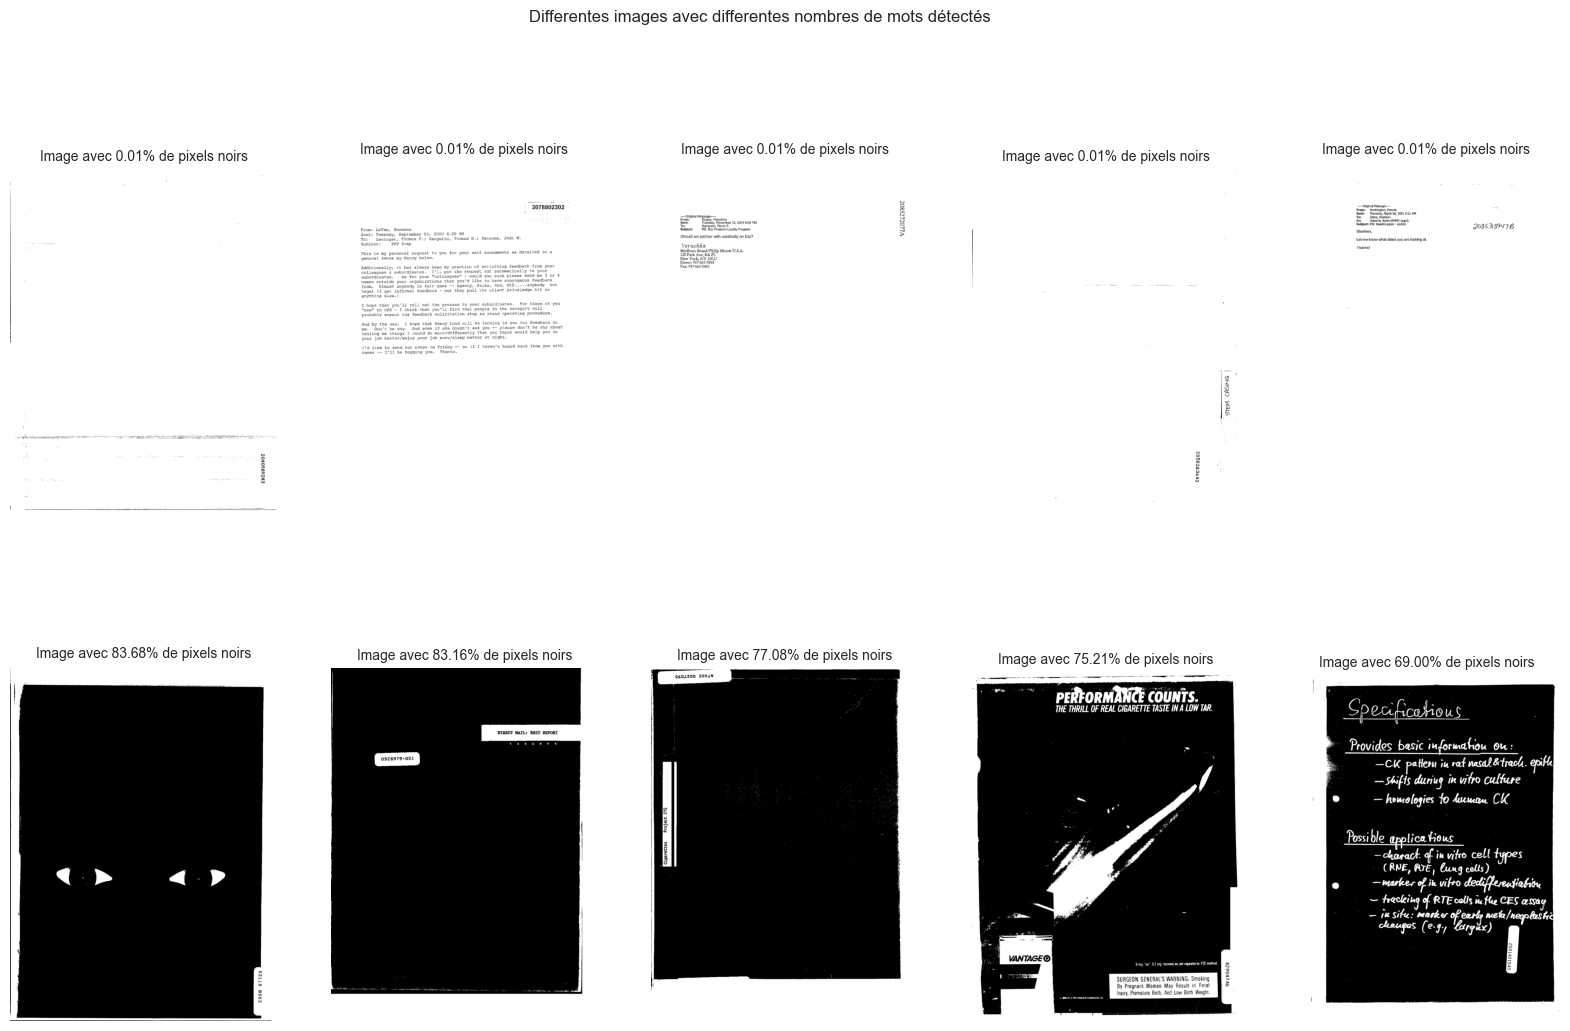

In [303]:
plt.figure(figsize=(50, 50))
fig, axs = plt.subplots(2,5, figsize=(20, 12))
fig.suptitle('Differentes images avec differentes nombres de mots détectés')


dfmin = df.nsmallest(5,'black_percent')
for x in range(0,5):
    axs[0,x].set_title(f"Image avec {dfmin['black_percent'].iloc[x]*100:.2f}% de pixels noirs", fontdict={'fontsize':10})
    axs[0,x].imshow(dfmin['picture'].iloc[x], cmap='gray')
    axs[0,x].axis('off');


dfmax = df.nlargest(5,'black_percent')
for x in range(0,5):
    axs[1,x].set_title(f"Image avec {dfmax['black_percent'].iloc[x] *100:.2f}% de pixels noirs", fontdict={'fontsize':10})
    axs[1,x].imshow(dfmax['picture'].iloc[x], cmap='gray')
    axs[1,x].axis('off');


plt.show();

_Afin de pouvoir traiter uniformement l'ensemble des documents, on pourrait inverser le noir et le blanc pour les documents avec des valeurs extremes, soit les documents avec plus de 50% de pixels noirs_

**Orientation du texte**

In [304]:
#get the global orientation of the pictures
df['orientation'] = df.filename.apply(lambda x: build_features.get_orientation(f"{rvlcdip_path}/{x}"))

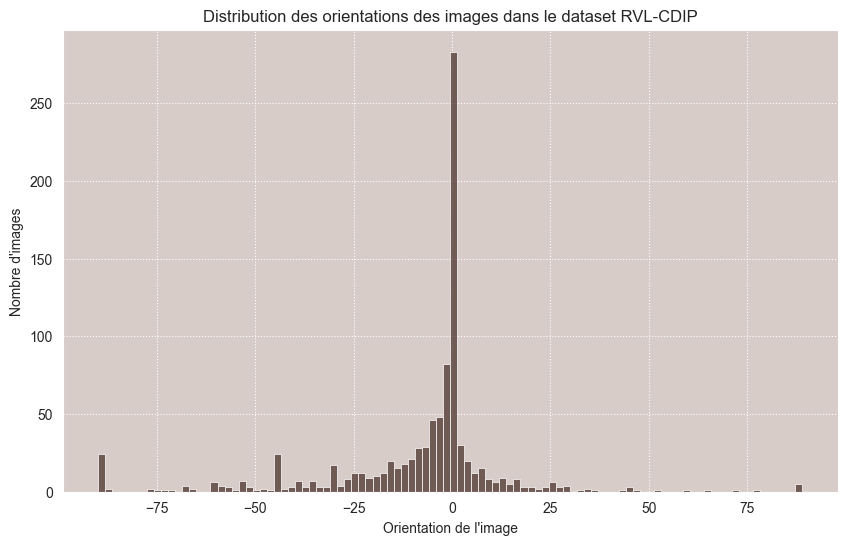

In [305]:
#ploting the orientation of the images
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(palette[-1])
plt.xlabel('Orientation de l\'image')
plt.ylabel('Nombre d\'images')
sns.set_palette(palette)
sns.histplot(df['orientation'], bins=100)
plt.title('Distribution des orientations des images dans le dataset RVL-CDIP')
plt.show()

<Figure size 5000x5000 with 0 Axes>

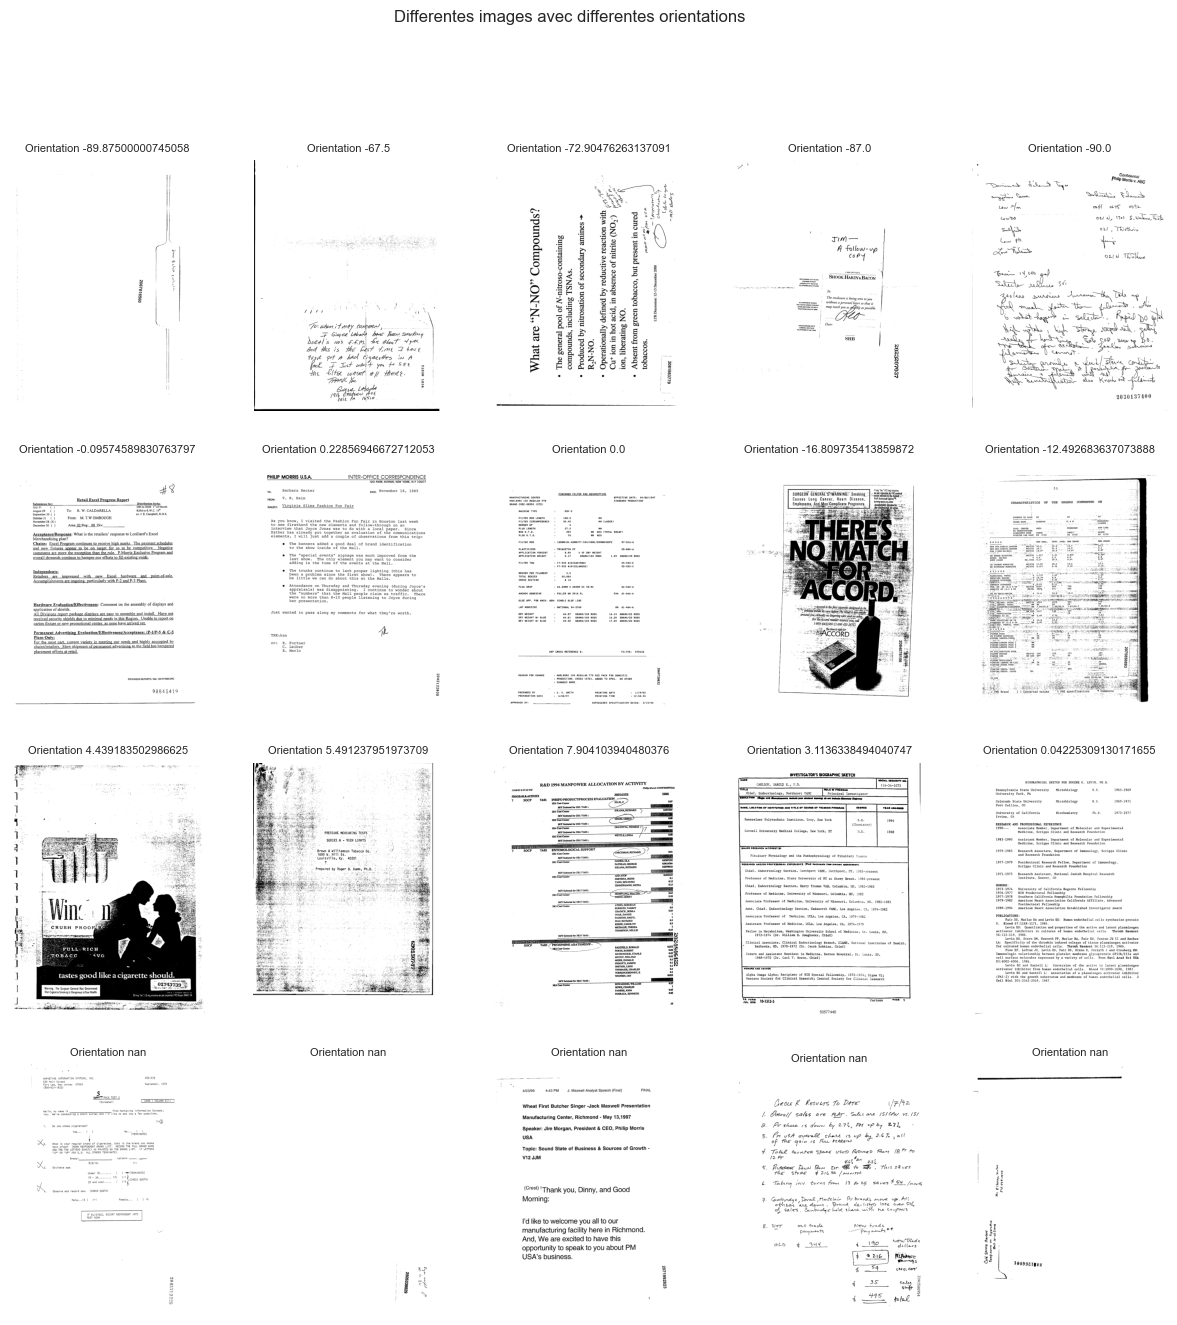

In [306]:
plt.figure(figsize=(50, 50))
fig, axs = plt.subplots(4,5, figsize=(15, 15))
fig.suptitle('Differentes images avec differentes orientations')


df90 = df[df.orientation < -60].sort_values(by=['orientation'], ascending=True).sample(5)
for x in range(0,5):
    axs[0,x].set_title('Orientation '+ str(df90['orientation'].iloc[x]), fontdict={'fontsize':8})
    axs[0,x].imshow(df90['picture'].iloc[x], cmap='gray')
    axs[0,x].axis('off')


df45 = df[(df.orientation >= -45) & (df.orientation < 20)].sort_values(by=['orientation'], ascending=True).sample(5)
for x in range(0,5):
    axs[1,x].set_title('Orientation '+ str(df45['orientation'].iloc[x]), fontdict={'fontsize':8})
    axs[1,x].imshow(df45['picture'].iloc[x], cmap='gray')
    axs[1,x].axis('off')

df0 = df[(df.orientation >= 0) & (df.orientation < 10)].sort_values(by=['orientation'], ascending=True).sample(5)
for x in range(0,5):
    axs[2,x].set_title('Orientation '+ str(df0['orientation'].iloc[x]), fontdict={'fontsize':8})
    axs[2,x].imshow(df0['picture'].iloc[x], cmap='gray')
    axs[2,x].axis('off')

dfnan = df[df.orientation.isna()].sort_values(by=['orientation'], ascending=True).sample(5)
for x in range(0,5):
    axs[3,x].set_title('Orientation '+ str(dfnan['orientation'].iloc[x]), fontdict={'fontsize':8})
    axs[3,x].imshow(dfnan['picture'].iloc[x], cmap='gray')
    axs[3,x].axis('off')
    
plt.show();


Les documents ont des orientations differentes.</br>
Cependant on remarque que la detection d'information a des difficultés sur les documents ayant peu de texte ou bien ayant beaucoup d'ecriture manuscrite

In [325]:
#On devra appliquer le meme preprocessing pour kaggle et le dataset global

**Taille des lettres**

In [307]:
#get the global orientation of the pictures
df['font_size'] = df.filename.apply(lambda x: build_features.get_letter_size(f"{rvlcdip_path}/{x}"))

In [311]:
display(df.font_size.describe())

count     992.000000
mean        9.191532
std        60.450271
min         1.000000
25%         3.000000
50%         6.000000
75%         7.000000
max      1000.000000
Name: font_size, dtype: float64

On remarque toujours des valeurs abérantes avec une taille de police de 1000 pixel, soit la hauteur de la page

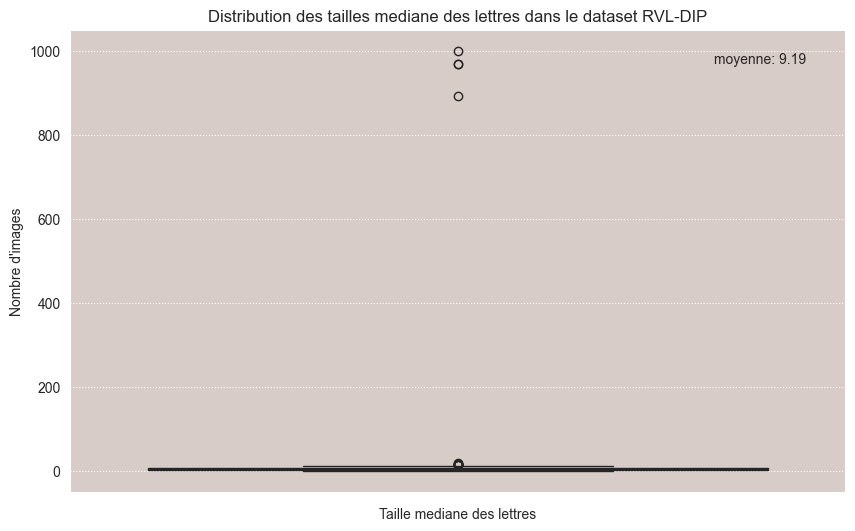

In [313]:
#ploting the letter size of the images
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(palette[-1])
plt.xlim(0, 50)
plt.xlabel('Taille mediane des lettres')
plt.ylabel('Nombre d\'images')
sns.set_palette(palette)
sns.boxplot(df['font_size'])
plt.text(0.95, 0.95, f"moyenne: {df['font_size'].mean():.2f}", horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)
plt.title('Distribution des tailles mediane des lettres dans le dataset RVL-DIP')
plt.show()

<Figure size 2000x2000 with 0 Axes>

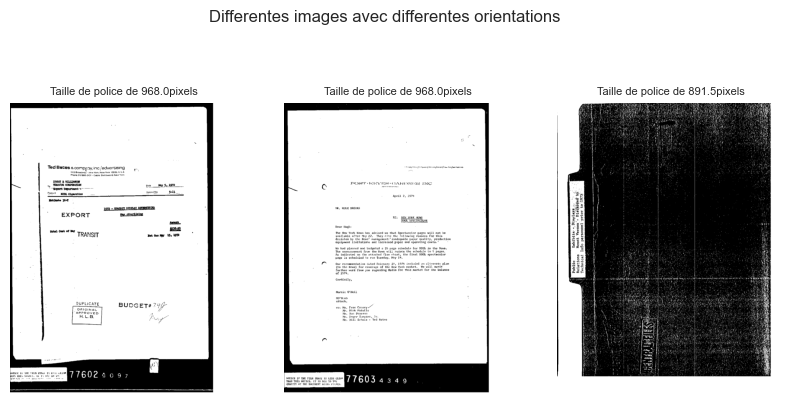

In [322]:

df_font_max = df[df.font_size > 800]

plt.figure(figsize=(20, 20))
fig, axs = plt.subplots(1,3, figsize=(10, 5))
fig.suptitle('Differentes images avec differentes orientations')


for x in range(0,3):
    axs[x].set_title('Taille de police de '+ str(df_font_max.font_size.iloc[x]) + 'pixels', fontdict={'fontsize':8})
    axs[x].imshow(df_font_max['picture'].iloc[x], cmap='gray')
    axs[x].axis('off')

_On remarque que les documents ne sont pas avec de gros caracteres. Les bordures ont été detectées comme des lettres._

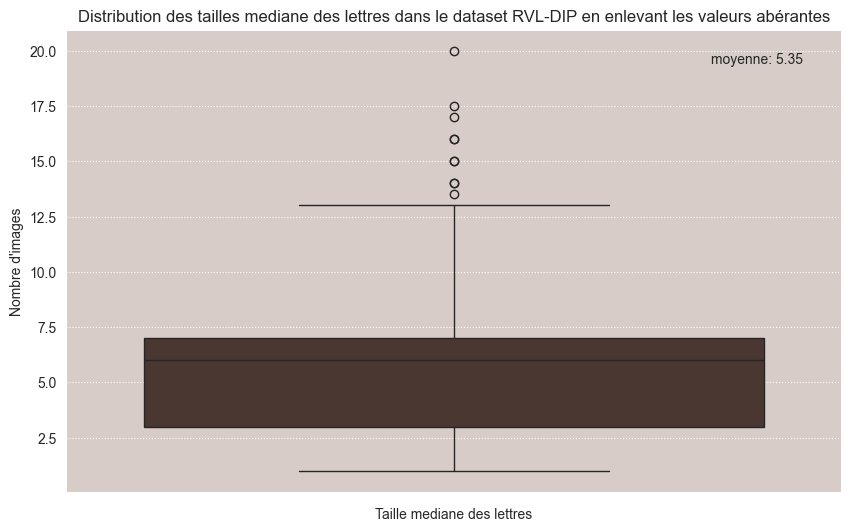

In [324]:
#ploting the letter size of the images
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(palette[-1])
plt.xlim(0, 50)
plt.xlabel('Taille mediane des lettres')
plt.ylabel('Nombre d\'images')
sns.set_palette(palette)
sns.boxplot(df[df.font_size<800]['font_size'])
plt.text(0.95, 0.95, f"moyenne: {df[df.font_size<800]['font_size'].mean():.2f}", horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)
plt.title('Distribution des tailles mediane des lettres dans le dataset RVL-DIP en enlevant les valeurs abérantes')
plt.show()

_On se retrouve avec des valeurs similaires au dataset de kaggle_

#### Labels

**Distribution des labels**

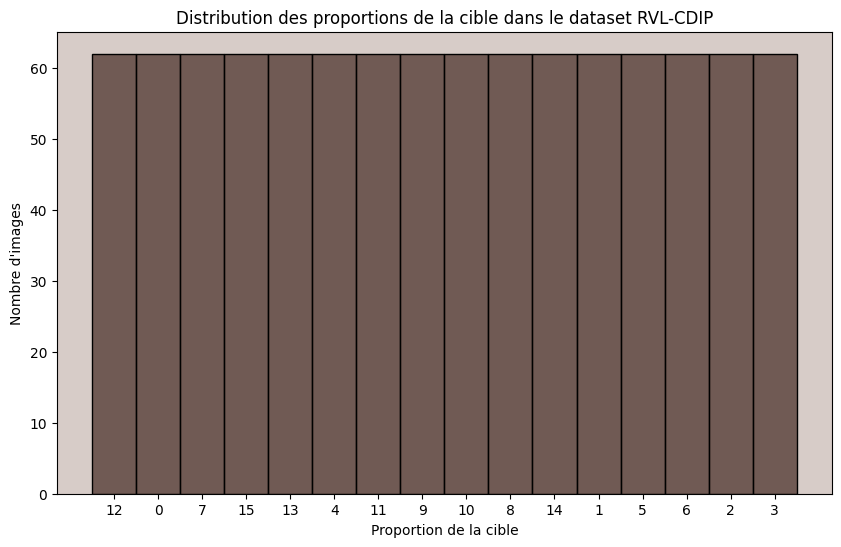

In [22]:
#ploting the proportions of target in an histogram
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(palette[-1])
plt.xlabel('Proportion de la cible')
plt.ylabel('Nombre d\'images')
sns.set_palette(palette)
sns.histplot(df['target'], bins=100)
plt.title('Distribution des proportions de la cible dans le dataset RVL-CDIP')
plt.show()